In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
x = [1.2,3,2,5,4,3.3,6.2,3.1,6.5,7,7.3,8,8.9,9]
y = [0,0,0,0,0,0,0,1,1,1,1,1,1,1]

In [23]:
df = pd.DataFrame({'x': x, 
                   'y': y })

In [24]:
df

,x,y
0,1.2,0
1,3.0,0
2,2.0,0
3,5.0,0
4,4.0,0
5,3.3,0
6,6.2,0
7,3.1,1
8,6.5,1
9,7.0,1


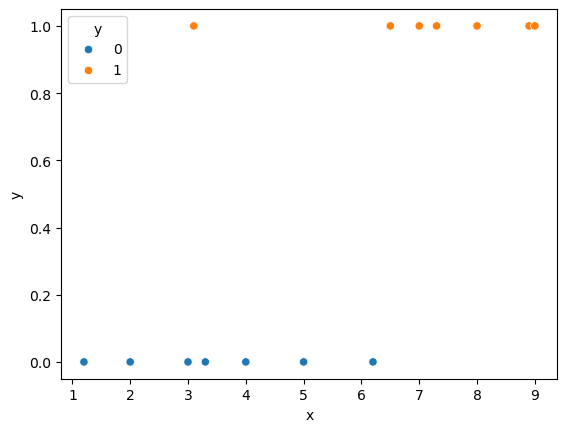

In [25]:
sns.scatterplot(data=df,x="x",y="y",hue="y")
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression()

In [28]:
clf.fit(df[["x"]],df["y"])

LogisticRegression()

In [29]:
clf.classes_

array([0, 1])

In [30]:
clf.coef_

array([[0.78526392]])

In [31]:
clf.intercept_

array([-4.20072848])

In [32]:
p = clf.predict_proba(df[["x"]])[:,1]

In [33]:
odds = p/(1-p)

In [34]:
log_odds = np.log(odds)

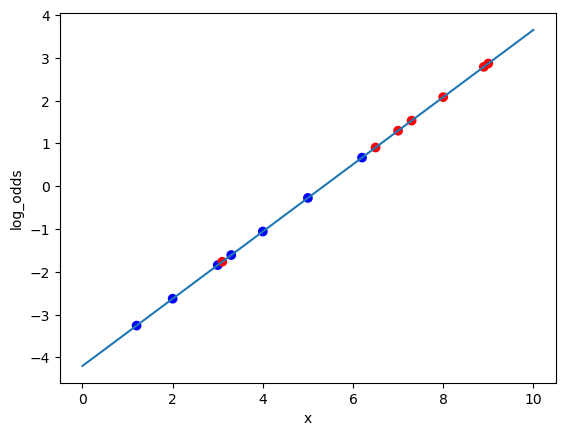

In [35]:
plt.scatter(df["x"],log_odds,
            color=["blue" for _ in range(7)]+["red" for _ in range(7)])
plt.plot(np.linspace(0,10),clf.coef_[0]*np.linspace(0,10)+clf.intercept_)
plt.xlabel("x")
plt.ylabel("log_odds")
plt.show()

In [36]:
def decide_class(x,threshold,clf):
    p = clf.predict_proba(x)[:,1]
    color = np.where(p<threshold,"blue","red")

    return color
    

In [37]:
test_points = np.linspace(0,10,num=100).reshape(-1,1)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


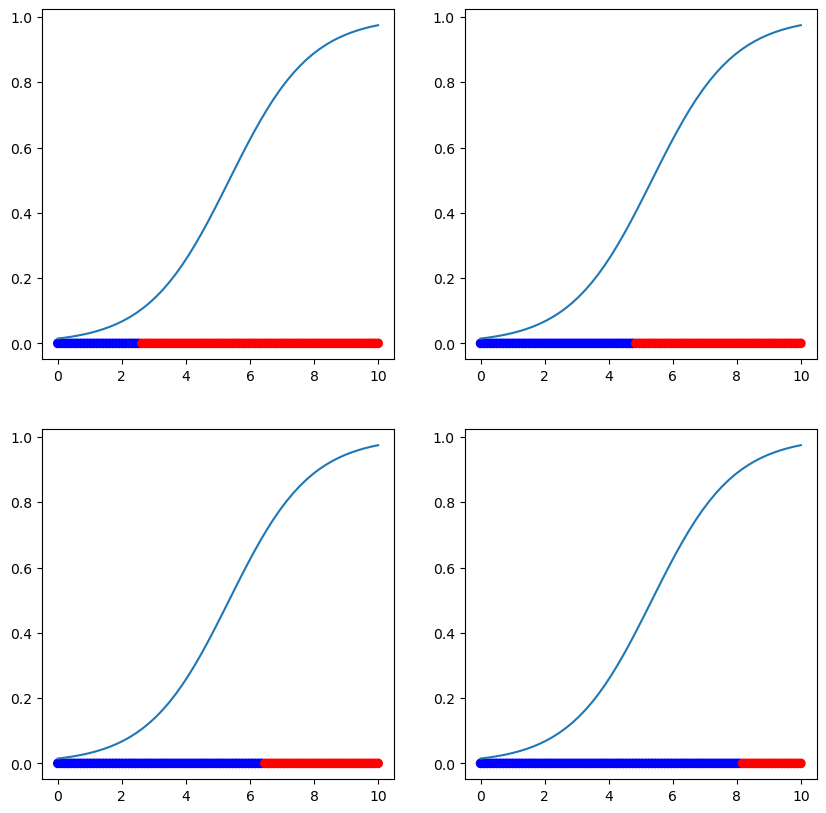

In [38]:
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(10)
fig.set_figheight(10)
thresholds = [0.1,0.4,0.7,0.9]

for ax,threshold in zip(axs.ravel(),thresholds):
    ax.plot(np.linspace(0,10),
        1/(1+np.exp(-(clf.coef_[0]*np.linspace(0,10)+clf.intercept_))))
    ax.scatter(x=test_points.ravel(),y=np.zeros_like(test_points.ravel()),
               color=decide_class(test_points,threshold,clf))


In [39]:
from sklearn.datasets import make_classification

In [40]:
X, y = make_classification(n_samples=500,n_features=2,
                           n_informative=1,n_redundant=0,n_clusters_per_class=1,
                           class_sep=0.2,random_state=42)

In [41]:
df1 = pd.DataFrame(np.hstack((X,y.reshape(-1,1))),columns=["x1","x2","y"])

<Axes: xlabel='x1', ylabel='x2'>

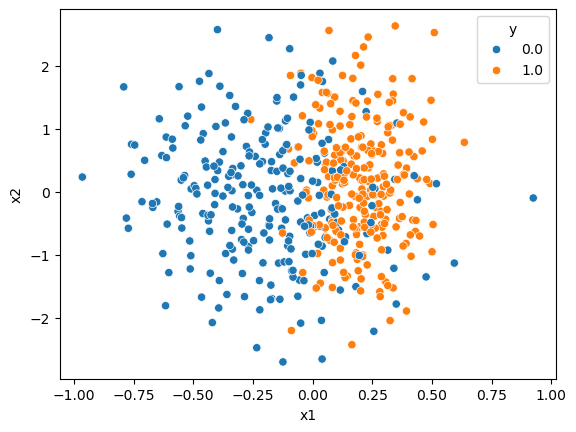

In [42]:
sns.scatterplot(data=df1,x="x1",y="x2",hue="y")

In [43]:
clf1 = LogisticRegression()

In [44]:
clf1.fit(df1[["x1","x2"]],df1["y"])

LogisticRegression()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


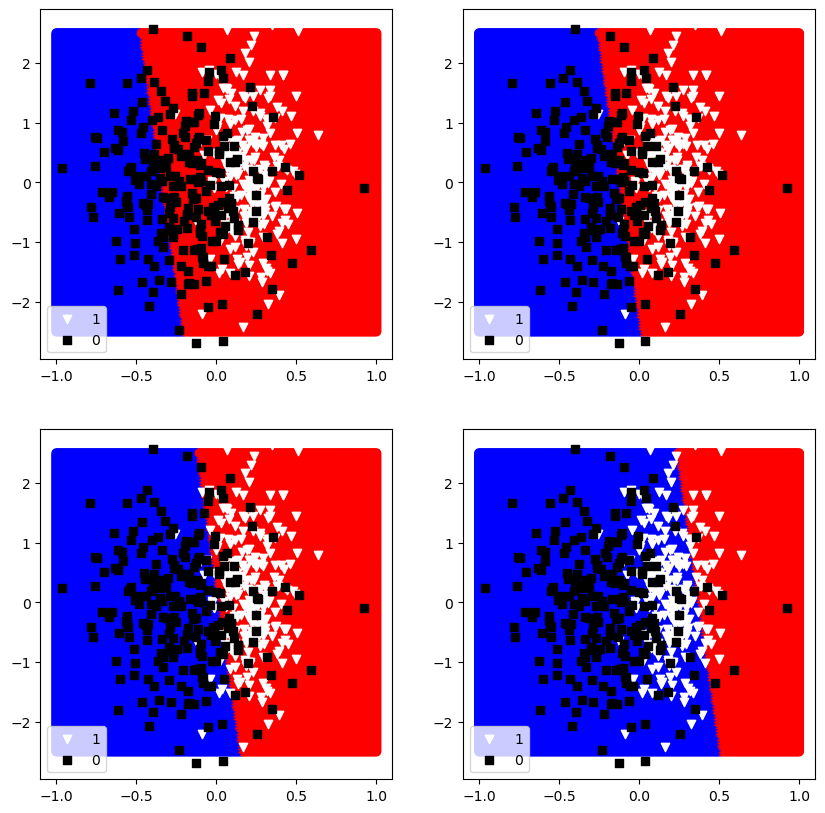

In [45]:
fig1, axs1 = plt.subplots(2, 2)
fig1.set_figwidth(10)
fig1.set_figheight(10)
thresholds1 = [0.1,0.3,0.5,0.9]
xx,yy = np.meshgrid(np.linspace(-1,1,200),np.linspace(-2.5,2.5,200))

for ax,threshold in zip(axs1.ravel(),thresholds1):
    ax.scatter(x=xx,y=yy,
               color=decide_class(np.hstack((xx.ravel().reshape(-1,1),yy.ravel().reshape(-1,1))),
                                  threshold,clf1))
    
    ax.scatter(x=df1.query("y == 1")["x1"],y=df1.query("y == 1")["x2"],marker='v',color='white',label='1')
    ax.scatter(x=df1.query("y == 0")["x1"],y=df1.query("y == 0")["x2"],marker='s',color='black',label='0')
    ax.legend()